In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_titanic=pd.read_csv('TitanicClean.csv')
df_titanic.drop('Unnamed: 0',axis=1,inplace=True)
df_titanic

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Died,Survived
0,22,M,S,7.2500,0,1,3,male,1,1,0
1,38,C,C,71.2833,0,2,1,female,1,0,1
2,26,M,S,7.9250,0,3,3,female,0,0,1
3,35,C,S,53.1000,0,4,1,female,1,0,1
4,35,M,S,8.0500,0,5,3,male,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,0,1305,3,male,0,1,0
1305,39,C,C,108.9000,0,1306,1,female,0,0,1
1306,38,M,S,7.2500,0,1307,3,male,0,1,0
1307,29,M,S,8.0500,0,1308,3,male,0,1,0


In [ ]:
d_survived=df_titanic['Died']
d_survived.replace(0,'Alive',inplace=True)
d_survived.replace(1,'Dead',inplace=True)
d_survived=pd.DataFrame(d_survived.value_counts().reset_index())
d_survived.rename(columns={'index':'Survival'},inplace=True)

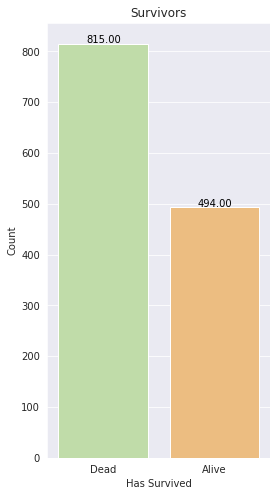

In [ ]:
plt.figure(figsize=(4,8))
sns.barplot(data=d_survived,x='Survival',y='Died',palette='Spectral_r')
sns.set_style('darkgrid')
plt.title("Survivors")
plt.ylabel('Count')
plt.xlabel('Has Survived')
for index,value in enumerate(d_survived['Died']):
  plt.annotate('%.2f'%value, xy=(index-0.15,value+1), color='Black')
plt.show()

In [ ]:
d_ageS=df_titanic.groupby('Age')['Survived'].mean().reset_index()
d_ageS=pd.DataFrame(d_ageS)
d_ageS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_ageS['Survival Rate']=d_ageS['Survival Rate']*100
d_ageS

,Age,Survival Rate
0,0,75.000000
1,1,80.000000
2,2,33.333333
3,3,85.714286
4,4,70.000000
...,...,...
68,70,0.000000
69,71,0.000000
70,74,0.000000
71,76,100.000000


In [ ]:
bin=np.linspace(min(d_ageS['Age']),max(d_ageS['Age']),5)
group=['Child(0-18 Years)','Youth(19-36 Years)','MiddleAge(37-54 Years)','Old(55-)']

In [ ]:
d_ageS.describe(percentiles=[0,1/5,1/2,9/10,1])

,Age,Survival Rate
count,73.000000,73.000000
mean,36.287671,40.170842
std,21.723310,24.525813
min,0.000000,0.000000
0%,0.000000,0.000000
20%,14.400000,23.333333
50%,36.000000,40.000000
90%,64.800000,75.000000
100%,80.000000,100.000000
max,80.000000,100.000000


In [ ]:
d_ageS['Category']=pd.qcut(d_ageS['Age'],labels=group,q=[0,1/5,1/2,9/10,1])
d_ageS=pd.DataFrame(d_ageS)
d_ageS=d_ageS.reset_index(drop=True)
d_ageS.drop('Age',inplace=True,axis=1)
d_ageS=d_ageS.groupby('Category')['Survival Rate'].mean().reset_index()

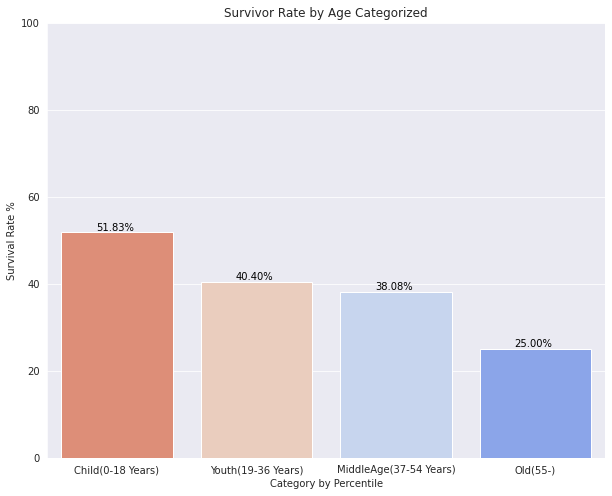

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=d_ageS,x='Category',y='Survival Rate',palette='coolwarm_r')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Age Categorized")
plt.ylabel('Survival Rate %')
plt.xlabel('Category by Percentile')
plt.ylim(0,100)
for index,value in enumerate(d_ageS['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
d_fareS=df_titanic.groupby('Fare')['Survived'].mean().reset_index()
d_fareS=pd.DataFrame(d_fareS)
d_fareS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_fareS['Survival Rate']=d_fareS['Survival Rate']*100
d_fareS

,Fare,Survival Rate
0,0.0000,5.882353
1,3.1708,0.000000
2,4.0125,0.000000
3,5.0000,0.000000
4,6.2375,0.000000
...,...,...
277,227.5250,60.000000
278,247.5208,66.666667
279,262.3750,71.428571
280,263.0000,66.666667


In [ ]:
group=['Low(33th%)','Mid(33-50th%)','High(50-75th%)','Top End(75-100th%)']

In [ ]:
d_fareS.describe(percentiles=[0, 1/3, 3/4, 1])

,Fare,Survival Rate
count,282.000000,282.000000
mean,38.845278,42.285535
std,52.997266,38.595774
min,0.000000,0.000000
0%,0.000000,0.000000
33.3%,12.283333,0.000000
50%,20.387500,50.000000
75%,49.503150,74.107143
100%,512.329200,100.000000
max,512.329200,100.000000


In [ ]:
d_fareS['Cost_Range']=pd.qcut(d_fareS['Fare'],labels=group,q=[0,1/3,1/2,3/4,1])
d_fareS=pd.DataFrame(d_fareS)
d_fareS=d_fareS.reset_index(drop=True)
d_fareS

,Fare,Survival Rate,Cost_Range
0,0.0000,5.882353,Low(33th%)
1,3.1708,0.000000,Low(33th%)
2,4.0125,0.000000,Low(33th%)
3,5.0000,0.000000,Low(33th%)
4,6.2375,0.000000,Low(33th%)
...,...,...,...
277,227.5250,60.000000,Top End(75-100th%)
278,247.5208,66.666667,Top End(75-100th%)
279,262.3750,71.428571,Top End(75-100th%)
280,263.0000,66.666667,Top End(75-100th%)


In [ ]:
d_fareS=pd.DataFrame(d_fareS.groupby('Cost_Range')['Survival Rate'].mean().reset_index())


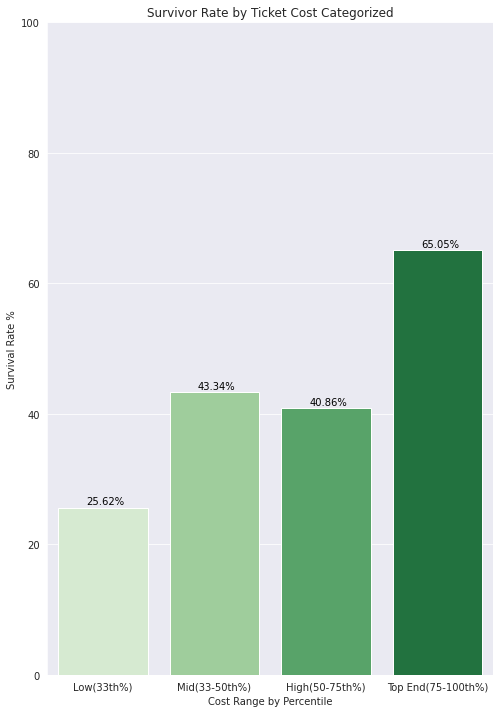

In [ ]:
plt.figure(figsize=(8,12))
sns.barplot(data=d_fareS,x='Cost_Range',y='Survival Rate',palette='Greens')
sns.set_style('darkgrid')
plt.ylabel('Survival Rate %')
plt.xlabel('Cost Range by Percentile')
plt.title("Survivor Rate by Ticket Cost Categorized")
plt.ylim(0,100)
for index, value in enumerate(d_fareS['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
d_cabin=df_titanic.groupby('Cabin')['Survived'].mean().reset_index()
d_cabin.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_cabin['Survival Rate']=d_cabin['Survival Rate']*100

In [ ]:
d_cabin

,Cabin,Survival Rate
0,A,45.454545
1,B,67.692308
2,C,57.446809
3,D,65.217391
4,E,68.292683
5,F,52.380952
6,G,60.000000
7,M,30.966469
8,T,0.000000


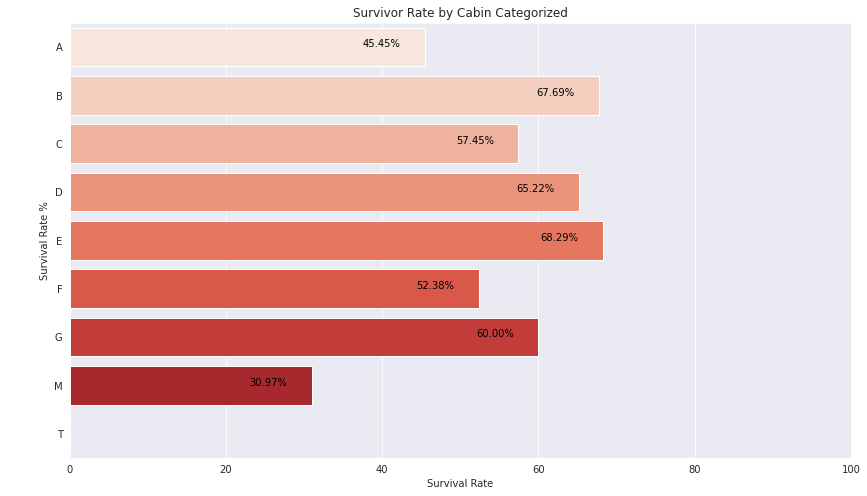

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=d_cabin,y='Cabin',x='Survival Rate',palette='Reds')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Cabin Categorized")
plt.ylabel('Survival Rate %')
plt.xlim(0,100)
for index, value in enumerate(d_cabin['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(value - 8, index - 0), color='Black')
plt.show()

In [ ]:
d_socioeco=df_titanic.groupby('Pclass')['Survived'].mean().reset_index()
d_socioeco.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_socioeco['Survival Rate']=d_socioeco['Survival Rate']*100

In [ ]:
d_socioeco

,Pclass,Survival Rate
0,1,57.585139
1,2,42.238267
2,3,26.939351


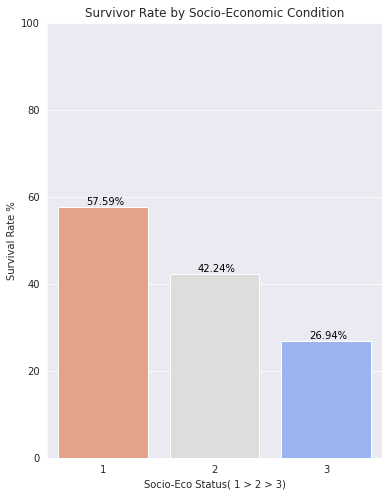

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(data=d_socioeco,x='Pclass',y='Survival Rate',palette='coolwarm_r')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Socio-Economic Condition")
plt.ylabel('Survival Rate %')
plt.xlabel('Socio-Eco Status( 1 > 2 > 3)')
plt.ylim(0,100)
for index, value in enumerate(d_socioeco['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
df_titanic

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Died,Survived
0,22,M,S,7.2500,0,1,3,male,1,Dead,0
1,38,C,C,71.2833,0,2,1,female,1,Alive,1
2,26,M,S,7.9250,0,3,3,female,0,Alive,1
3,35,C,S,53.1000,0,4,1,female,1,Alive,1
4,35,M,S,8.0500,0,5,3,male,0,Dead,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,0,1305,3,male,0,Dead,0
1305,39,C,C,108.9000,0,1306,1,female,0,Alive,1
1306,38,M,S,7.2500,0,1307,3,male,0,Dead,0
1307,29,M,S,8.0500,0,1308,3,male,0,Dead,0


In [ ]:
d_family=df_titanic[['Parch','SibSp','Survived']]
d_family['Fsize']=d_family['Parch']+d_family['SibSp']+1
d_family.drop('Parch',inplace=True,axis=1)
d_family.drop('SibSp',inplace=True,axis=1)

In [ ]:
d_family=d_family.groupby('Fsize')['Survived'].mean().reset_index()
d_family.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_family['Survival Rate']=d_family['Survival Rate']*100

In [ ]:
d_family

,Fsize,Survival Rate
0,0,29.240506
1,1,53.191489
2,2,55.974843
3,3,72.093023
4,4,22.727273
5,5,20.000000
6,6,31.250000
7,7,12.500000
8,10,18.181818


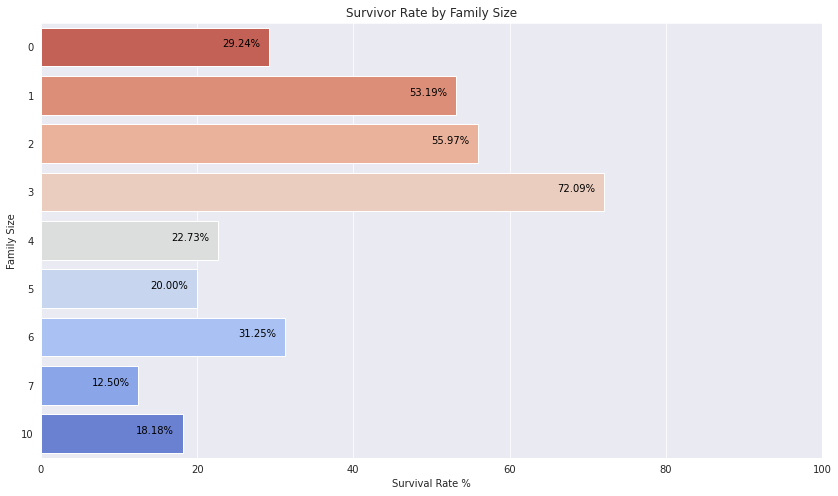

In [ ]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.barplot(data=d_family,y='Fsize',x='Survival Rate',palette='coolwarm_r',orient='h')
plt.title("Survivor Rate by Family Size")
plt.xlabel('Survival Rate %')
plt.ylabel('Family Size')
plt.xlim(0,100)
for index, value in enumerate(d_family['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(value - 6, index - 0), color='Black')
plt.show()